In [12]:
import pandas as pd

# Path to the CSV file
import matplotlib.pyplot as plt

csv_file = 'RetoIA\datasetIA.csv'

# Read the CSV file using pandas
data = pd.read_csv(csv_file,sep=';')
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
columns_to_drop = ["Numero de piezas", "Tiempo total de la prueba"]  # Lista de columnas a eliminar
data = data.drop(columns=columns_to_drop)  # Eliminar las columnas del DataFrame

# Define a function to show a graph of a column
def show_graph(column_name):
    # Plot the column as a graph
    plt.plot(data[column_name])
    plt.title(column_name) # Set the title of the graph

# Set x and y limits
    plt.xlim([1,20])  # replace xmin and xmax with the limits you want
    plt.show() # Display the graph

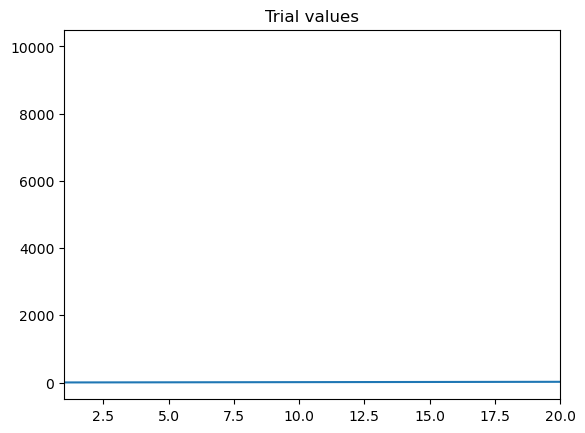

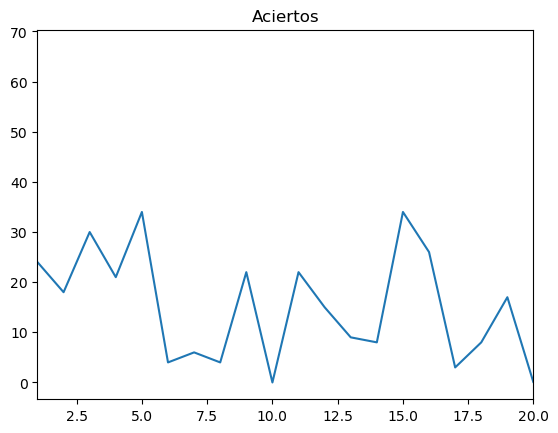

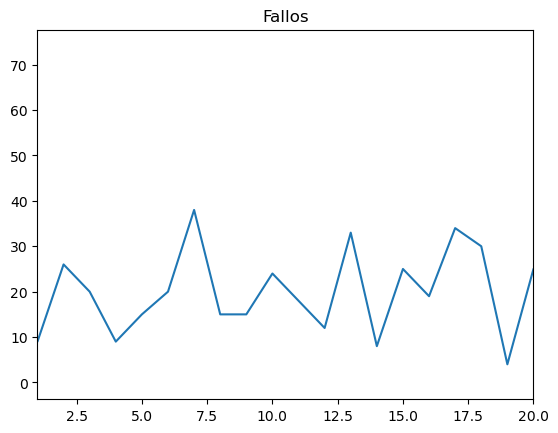

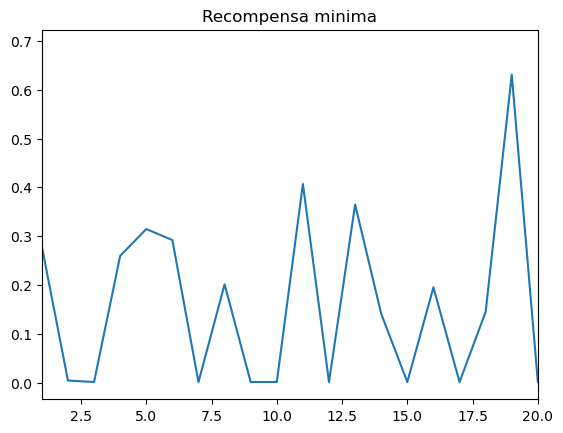

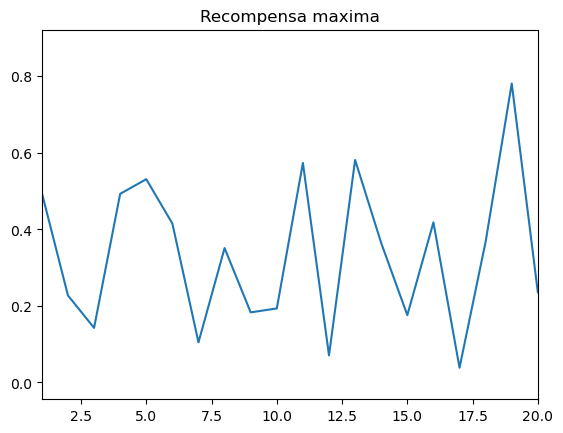

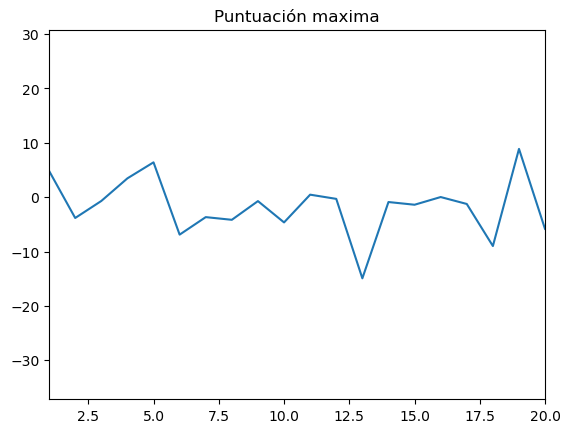

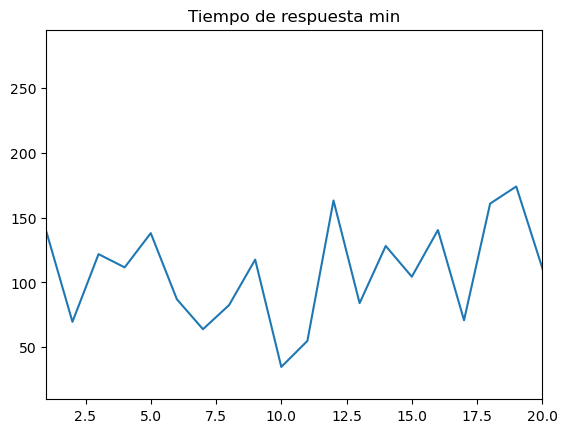

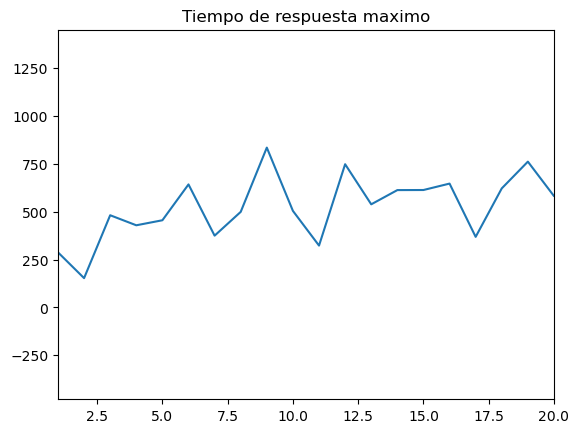

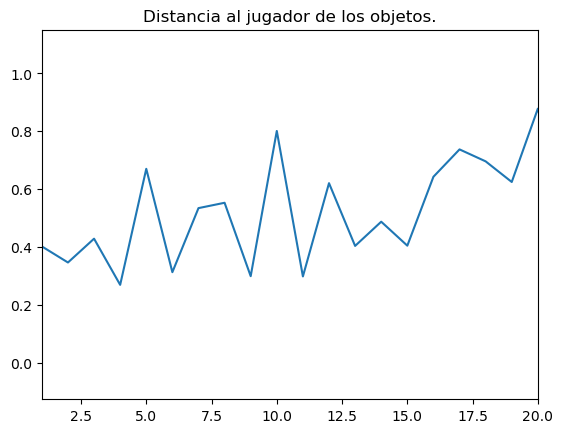

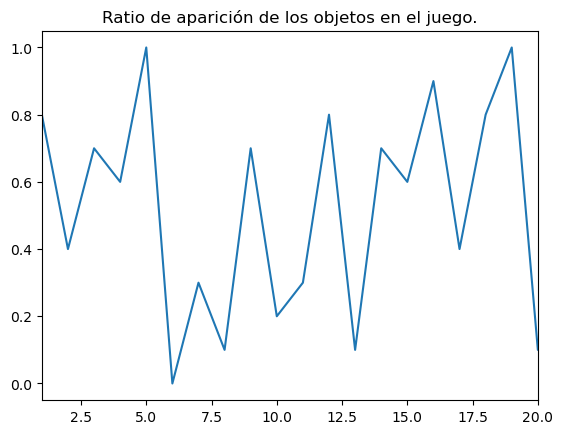

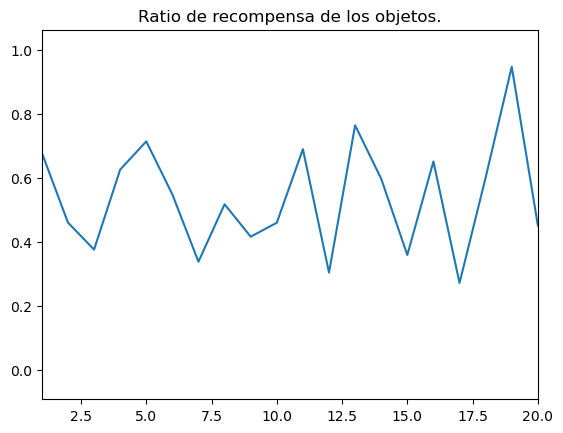

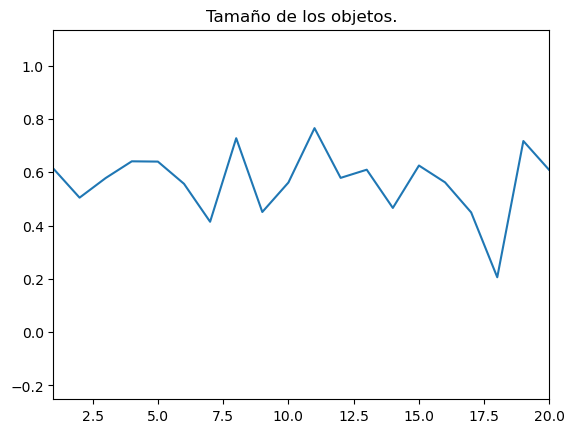

In [13]:
columnas = ["Trial values", "Aciertos", "Fallos", "Recompensa minima", "Recompensa maxima", "Puntuación maxima", "Tiempo de respuesta min", "Tiempo de respuesta maximo", "Distancia al jugador de los objetos.", "Ratio de aparición de los objetos en el juego.", "Ratio de recompensa de los objetos.", "Tamaño de los objetos."]

# Call the function to show a graph of a specific column
for i in columnas:
    show_graph(i)

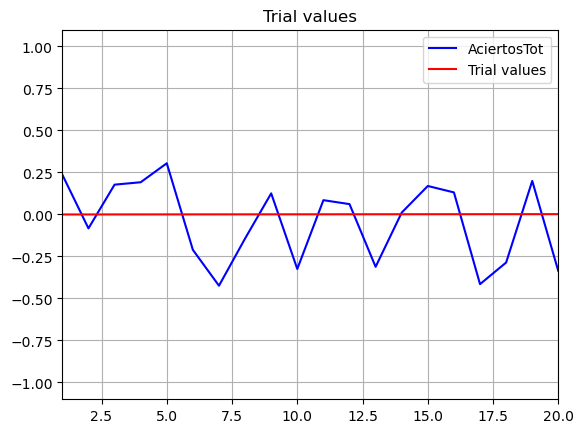

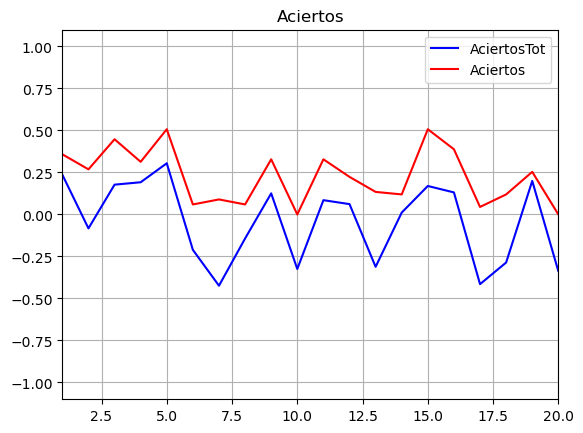

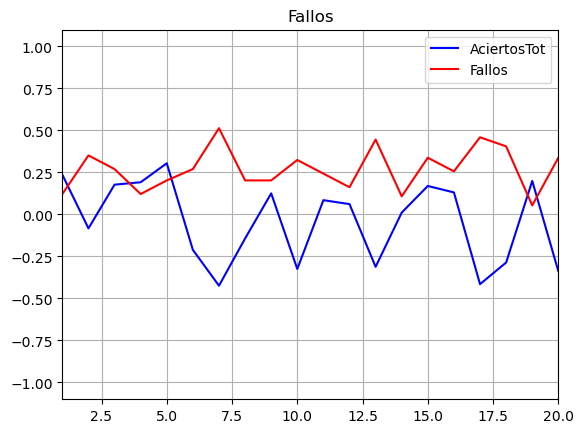

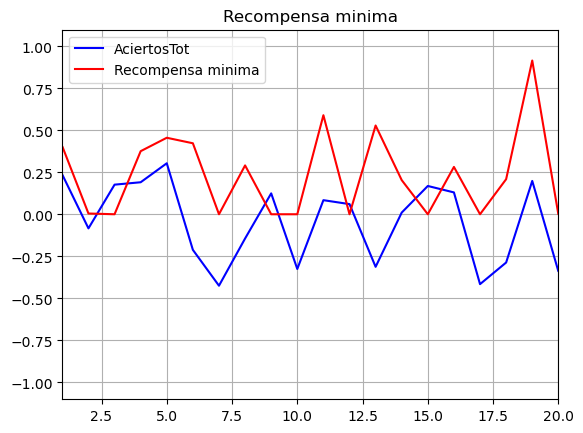

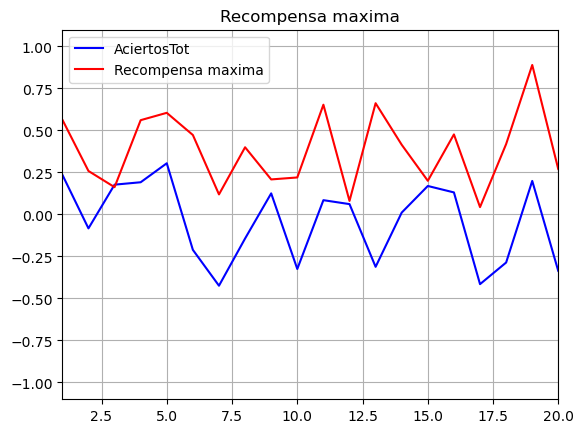

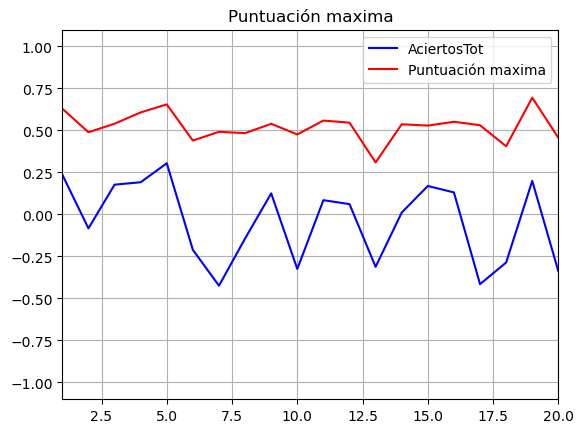

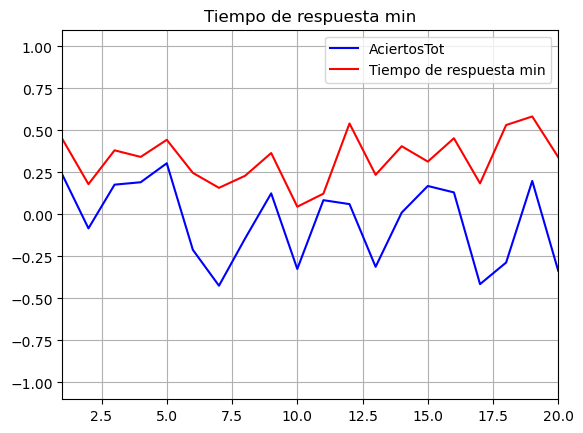

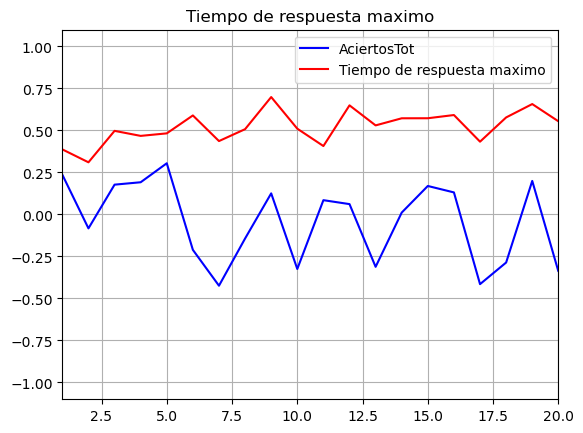

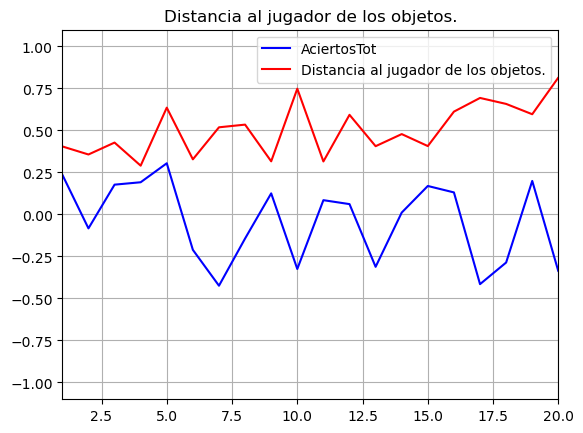

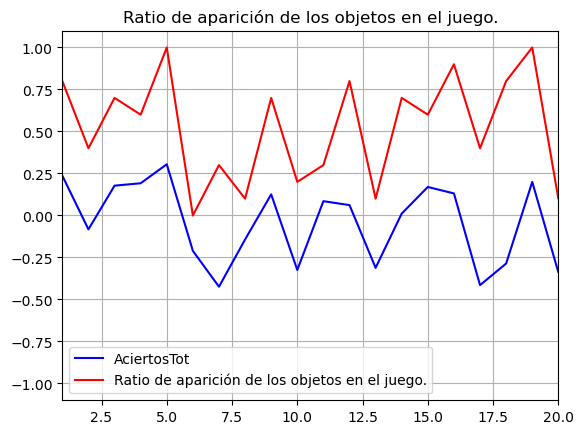

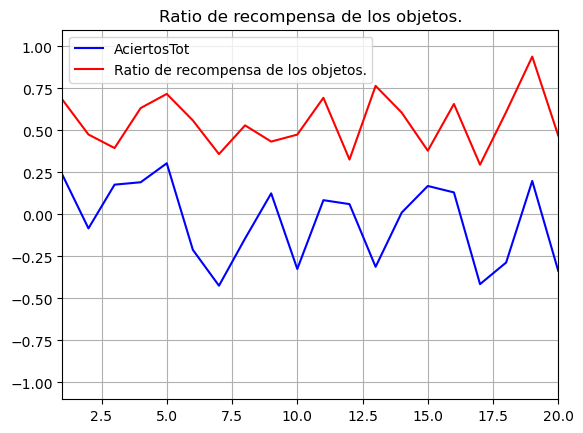

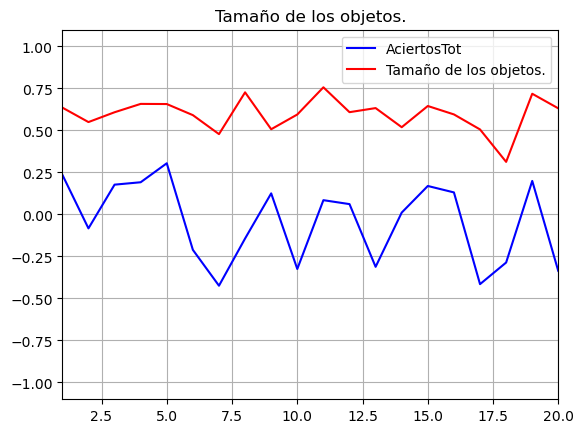

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Assuming 'data' is your DataFrame
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

for i in columnas:
    plt.plot(data_normalized['Aciertos']-data_normalized['Fallos'], color='blue', label='AciertosTot')  # replace 'column1' with your column name
    plt.plot(data_normalized[i], color='red', label=i)  # replace 'column2' with your column name
    # Add more lines as needed
    plt.xlim([1,20])
    plt.title(i)  # Set the title of the graph
    plt.legend()  # Display the legend
    plt.grid(True)
    plt.show()  # Display the graph

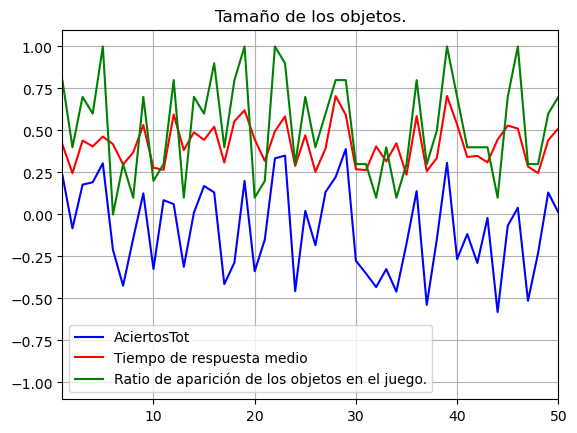

In [15]:
plt.plot(data_normalized['Aciertos']-data_normalized['Fallos'], color='blue', label='AciertosTot')  # replace 'column1' with your column name
plt.plot((data_normalized["Tiempo de respuesta min"]+data_normalized["Tiempo de respuesta maximo"])/2, color='red', label="Tiempo de respuesta medio")  # replace 'column2' with your column name
plt.plot(data_normalized["Ratio de aparición de los objetos en el juego."], color='green', label="Ratio de aparición de los objetos en el juego.")  # replace 'column2' with your column name

# Add more lines as needed
plt.xlim([1,50])
plt.title(i)  # Set the title of the graph
plt.legend()  # Display the legend
plt.grid(True)
plt.show()  # Display the graph

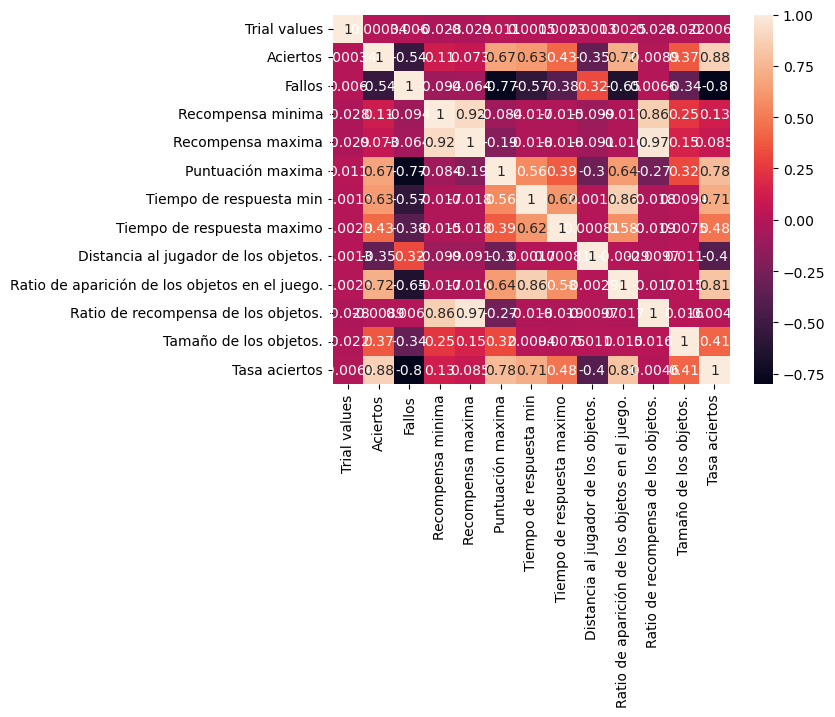

In [30]:
# Assuming 'data' is your DataFrame
data_normalized["Tasa aciertos"]=data_normalized["Aciertos"]/(data_normalized["Aciertos"]+data_normalized["Fallos"])
correlation_matrix = data_normalized.corr()

#print(correlation_matrix)
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [34]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

data_normalized = data_normalized.dropna()#
# Assuming 'data' is your DataFrame and 'target1', 'target2', 'target3', 'target4' are the columns you want to predict
X = data_normalized.drop(["Ratio de aparición de los objetos en el juego.","Distancia al jugador de los objetos.","Ratio de recompensa de los objetos.","Tamaño de los objetos."], axis=1)  # Use all columns except targets as features
y = data_normalized[["Ratio de aparición de los objetos en el juego.","Distancia al jugador de los objetos.","Ratio de recompensa de los objetos.","Tamaño de los objetos."]]  # Use 'target1', 'target2', 'target3', 'target4' columns as labels

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create MLPRegressor object
mlp = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

# Train the model
mlp.fit(X_train, y_train)

# Use the model to make predictions
predictions = mlp.predict(X_test)
print(predictions)
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

[[0.64580189 0.52631723 0.30111658 0.48562833]
 [0.39924829 0.50383249 0.54371104 0.55255   ]
 [0.25728438 0.52693557 0.47983614 0.52161964]
 ...
 [0.47739025 0.50288833 0.33126782 0.47722098]
 [0.24712323 0.47141112 0.66955934 0.58012769]
 [0.5347839  0.4685024  0.68856706 0.61108848]]
Mean Absolute Error: 0.08315924696823193
Mean Squared Error: 0.011647841662477952
R-squared: 0.4505220286098407


In [42]:

row = data_normalized.iloc[9990]
row.drop(["Ratio de aparición de los objetos en el juego.","Distancia al jugador de los objetos.","Ratio de recompensa de los objetos.","Tamaño de los objetos."], axis=1)
row[["Tasa aciertos"]]=0.6
print(row)  # Get the first row])
predictions = mlp.predict(row)

ValueError: No axis named 1 for object type Series